In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import scipy.integrate as scpi

import cbmos_serial as cbmos
import force_functions as ff
import euler_forward as ef
import adams_bashforth as ab
import midpoint as md
import heun as he
import cell as cl

plt.style.use('seaborn-whitegrid')
plt.style.use('tableau-colorblind10')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6.75, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [2]:
# Simulation parameters
s = 1.0    # rest length
tf = 1.0  # final time
rA = 1.5   # maximum interaction distance

seed=17
mu_cubic=5.70
params_cubic = {"mu": mu_cubic, "s": s, "rA": rA}
muR = 9.1
ratio = 0.21
params_poly = {'muA': muR*ratio, 'muR': muR, 'rA': rA, 'rR': 1.0/(1.0-np.sqrt(ratio)/3.0), 'n': 1.0, 'p': 1.0}
mu_gls = 1.95
params_gls = {'mu': mu_gls, 'a':-2*np.log(0.002/mu_gls)}
params = {'cubic': params_cubic, 'pw. quad.': params_poly, 'GLS': params_gls}

In [3]:
force_names = ['cubic', 'pw. quad.', 'GLS']


defcolors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors = {'cubic': defcolors[0], 'pw. quad.': defcolors[1], 'GLS': defcolors[3]}

In [4]:
solvers = {'pw. quad.': cbmos.CBMSolver(ff.piecewise_polynomial, scpi.solve_ivp, 1), 
             'cubic': cbmos.CBMSolver(ff.cubic, scpi.solve_ivp, 1),
             'GLS': cbmos.CBMSolver(ff.gls, scpi.solve_ivp, 1)}

In [5]:
# Initial condition
cell_list = [cl.Cell(0, [0], proliferating=True), cl.Cell(1, [0.3], proliferating=True)]
t_data = np.linspace(0,tf,100*tf)

In [6]:
sol = {'cubic': [], 'pw. quad.': [], 'GLS': []}
for force in force_names:
    history = solvers[force].simulate(cell_list, t_data, params[force], {}, seed=seed)
    y = np.array([np.abs(clt[1].position - clt[0].position) for clt in history])
    sol[force] = y

Text(0, 0.5, 'Separation in cell diameters')

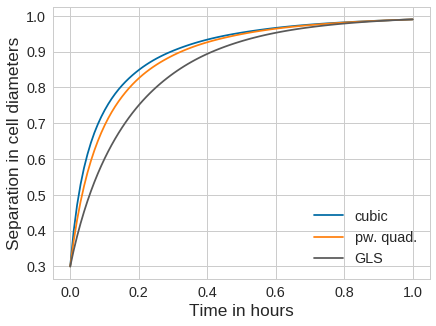

In [7]:
for force in force_names: 
    plt.plot(t_data, sol[force], label=force, color=colors[force])
plt.legend()
plt.xlabel('Time in hours')
plt.ylabel('Separation in cell diameters')
plt.savefig()

In [8]:
tf = 2.0
t_data = np.linspace(0,tf,100*tf)
params_cubic = {"mu": mu_cubic/tf, "s": s, "rA": rA}
params_poly = {'muA': muR/tf*ratio, 'muR': muR/tf, 'rA': rA, 'rR': 1.0/(1.0-np.sqrt(ratio)/3.0), 'n': 1.0, 'p': 1.0}
params_gls = {'mu': mu_gls/tf, 'a':-2*np.log(0.002/mu_gls/tf)}
params = {'cubic': params_cubic, 'pw. quad.': params_poly, 'GLS': params_gls}

In [9]:
sol = {'cubic': [], 'pw. quad.': [], 'GLS': []}
for force in force_names:
    history = solvers[force].simulate(cell_list, t_data, params[force], {}, seed=seed)
    y = np.array([np.abs(clt[1].position - clt[0].position) for clt in history])
    sol[force] = y

Text(0, 0.5, 'Separation in cell diameters')

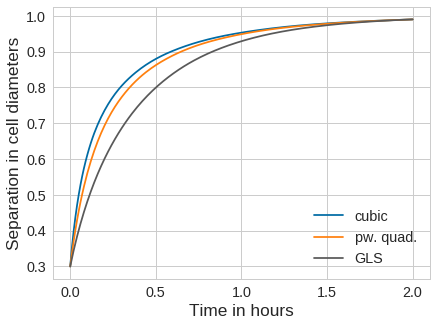

In [10]:
for force in force_names: 
    plt.plot(t_data, sol[force], label=force, color=colors[force])
plt.legend()
plt.xlabel('Time in hours')
plt.ylabel('Separation in cell diameters')

In [11]:
tf = 3.5
t_data = np.linspace(0,tf,100*tf)
params_cubic = {"mu": mu_cubic/tf, "s": s, "rA": rA}
params_poly = {'muA': muR/tf*ratio, 'muR': muR/tf, 'rA': rA, 'rR': 1.0/(1.0-np.sqrt(ratio)/3.0), 'n': 1.0, 'p': 1.0}
params_gls = {'mu': mu_gls/tf, 'a':-2*np.log(0.002/mu_gls/tf)}
params = {'cubic': params_cubic, 'pw. quad.': params_poly, 'GLS': params_gls}

In [12]:
sol = {'cubic': [], 'pw. quad.': [], 'GLS': []}
for force in force_names:
    history = solvers[force].simulate(cell_list, t_data, params[force], {}, seed=seed)
    y = np.array([np.abs(clt[1].position - clt[0].position) for clt in history])
    sol[force] = y

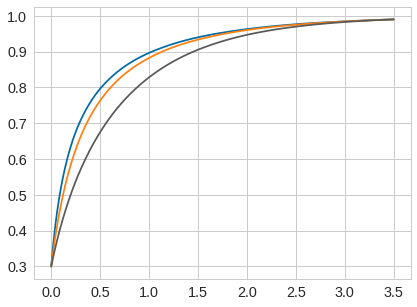

In [13]:
for force in force_names: 
    plt.plot(t_data, sol[force], label=force, color=colors[force])